# Market Data Visualization

This notebook provides visualizations for:
- Price evolution over time for each ticker
- Returns distribution (histograms)
- VIX volatility index analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

# Load data
data_dir = Path("./data")
output_dir = Path("./visu_output")
output_dir.mkdir(parents=True, exist_ok=True)
prices = pd.read_csv(data_dir / "prices.csv", index_col=0, parse_dates=True)
returns = pd.read_csv(data_dir / "returns.csv", index_col=0, parse_dates=True)
vix = pd.read_csv(data_dir / "vix.csv", index_col=0, parse_dates=True)

print(f"VIX data shape: {vix.shape}")

print("Data loaded successfully!")
print(f"Returns data shape: {returns.shape}")
print(f"Price data shape: {prices.shape}")

VIX data shape: (2322, 1)
Data loaded successfully!
Returns data shape: (3371, 12)
Price data shape: (3372, 12)


## Price Evolution Over Time

Visualize the adjusted close prices for all tickers over the entire period.

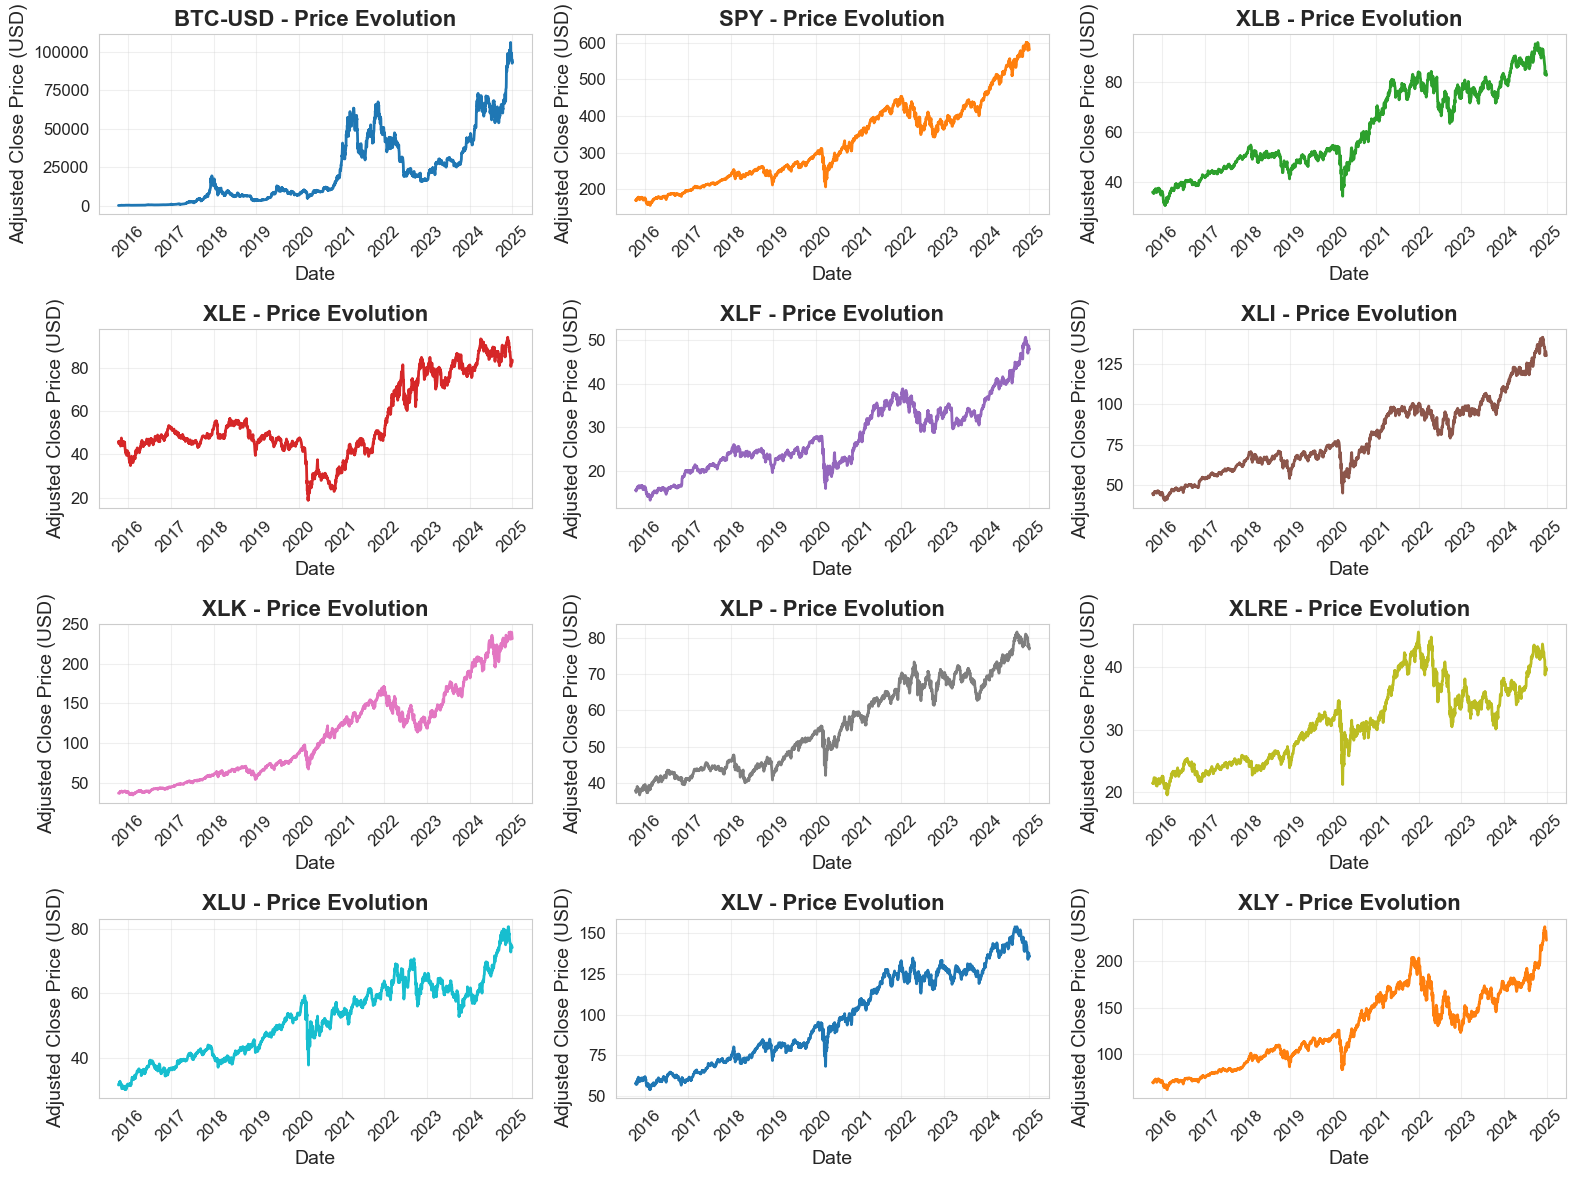

✓ Price evolution charts saved to visu_output/price_evolution.png


In [2]:
# Plot all tickers on separate subplots for better visibility
fig, axes = plt.subplots(4, 3, figsize=(16, 12))
axes = axes.flatten()

for idx, ticker in enumerate(prices.columns):
    ax = axes[idx]
    ax.plot(prices.index, prices[ticker], linewidth=2, color=f'C{idx}')
    ax.set_title(f'{ticker} - Price Evolution', fontsize=16, fontweight='bold')
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Adjusted Close Price (USD)', fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.savefig(output_dir / 'price_evolution.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Price evolution charts saved to visu_output/price_evolution.png")

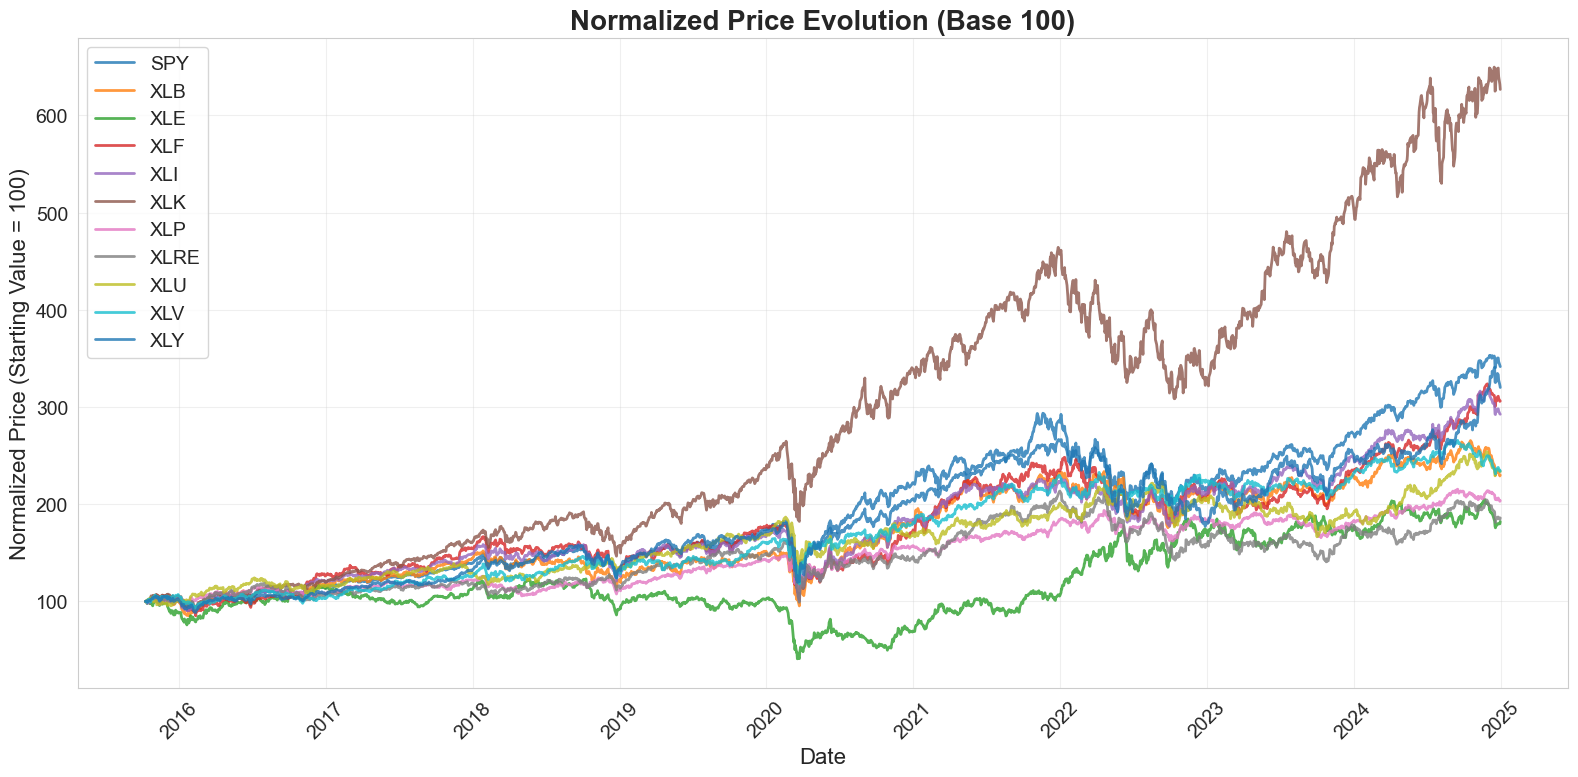

✓ Normalized price evolution chart saved to visu_output/price_evolution_normalized.png


In [3]:
# Alternative: All prices on one chart (normalized to starting value = 100)
fig, ax = plt.subplots(figsize=(16, 8))

# Normalize prices to 100 at the start for comparison
prices_normalized = (prices / prices.iloc[0]) * 100

for ticker in prices_normalized.columns[1:]: # Skip the first ticker (BTC)
    ax.plot(prices_normalized.index, prices_normalized[ticker], 
            linewidth=2, label=ticker, alpha=0.8)

ax.set_title('Normalized Price Evolution (Base 100)', fontsize=20, fontweight='bold')
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Normalized Price (Starting Value = 100)', fontsize=16)
ax.legend(loc='upper left', fontsize=14)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(output_dir / 'price_evolution_normalized.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Normalized price evolution chart saved to visu_output/price_evolution_normalized.png")

## Returns Distribution

Analyze the distribution of daily returns for each ticker using histograms.

In [4]:
# Calculate statistics for each ticker
print("Daily Returns Statistics:\n")
print(returns.describe())
print("\n" + "="*80 + "\n")

# Skewness and Kurtosis
print("Skewness (measure of asymmetry):")
print(returns.skew())
print("\nKurtosis (measure of tail heaviness):")
print(returns.kurtosis())

Daily Returns Statistics:

           BTC-USD          SPY          XLB          XLE          XLF  \
count  3371.000000  3371.000000  3371.000000  3371.000000  3371.000000   
mean      0.002430     0.000401     0.000297     0.000278     0.000389   
std       0.036338     0.008523     0.009969     0.014152     0.010726   
min      -0.371695    -0.095677    -0.096278    -0.143571    -0.108144   
25%      -0.012320    -0.001913    -0.003567    -0.005056    -0.003105   
50%       0.001586     0.000318     0.000228     0.000314     0.000376   
75%       0.017159     0.003207     0.003829     0.005448     0.004177   
max       0.252472     0.090603     0.117601     0.160373     0.131566   

               XLI          XLK          XLP         XLRE          XLU  \
count  3371.000000  3371.000000  3371.000000  3371.000000  3371.000000   
mean      0.000364     0.000609     0.000236     0.000233     0.000295   
std       0.009505     0.011394     0.007116     0.009913     0.009320   
min      -

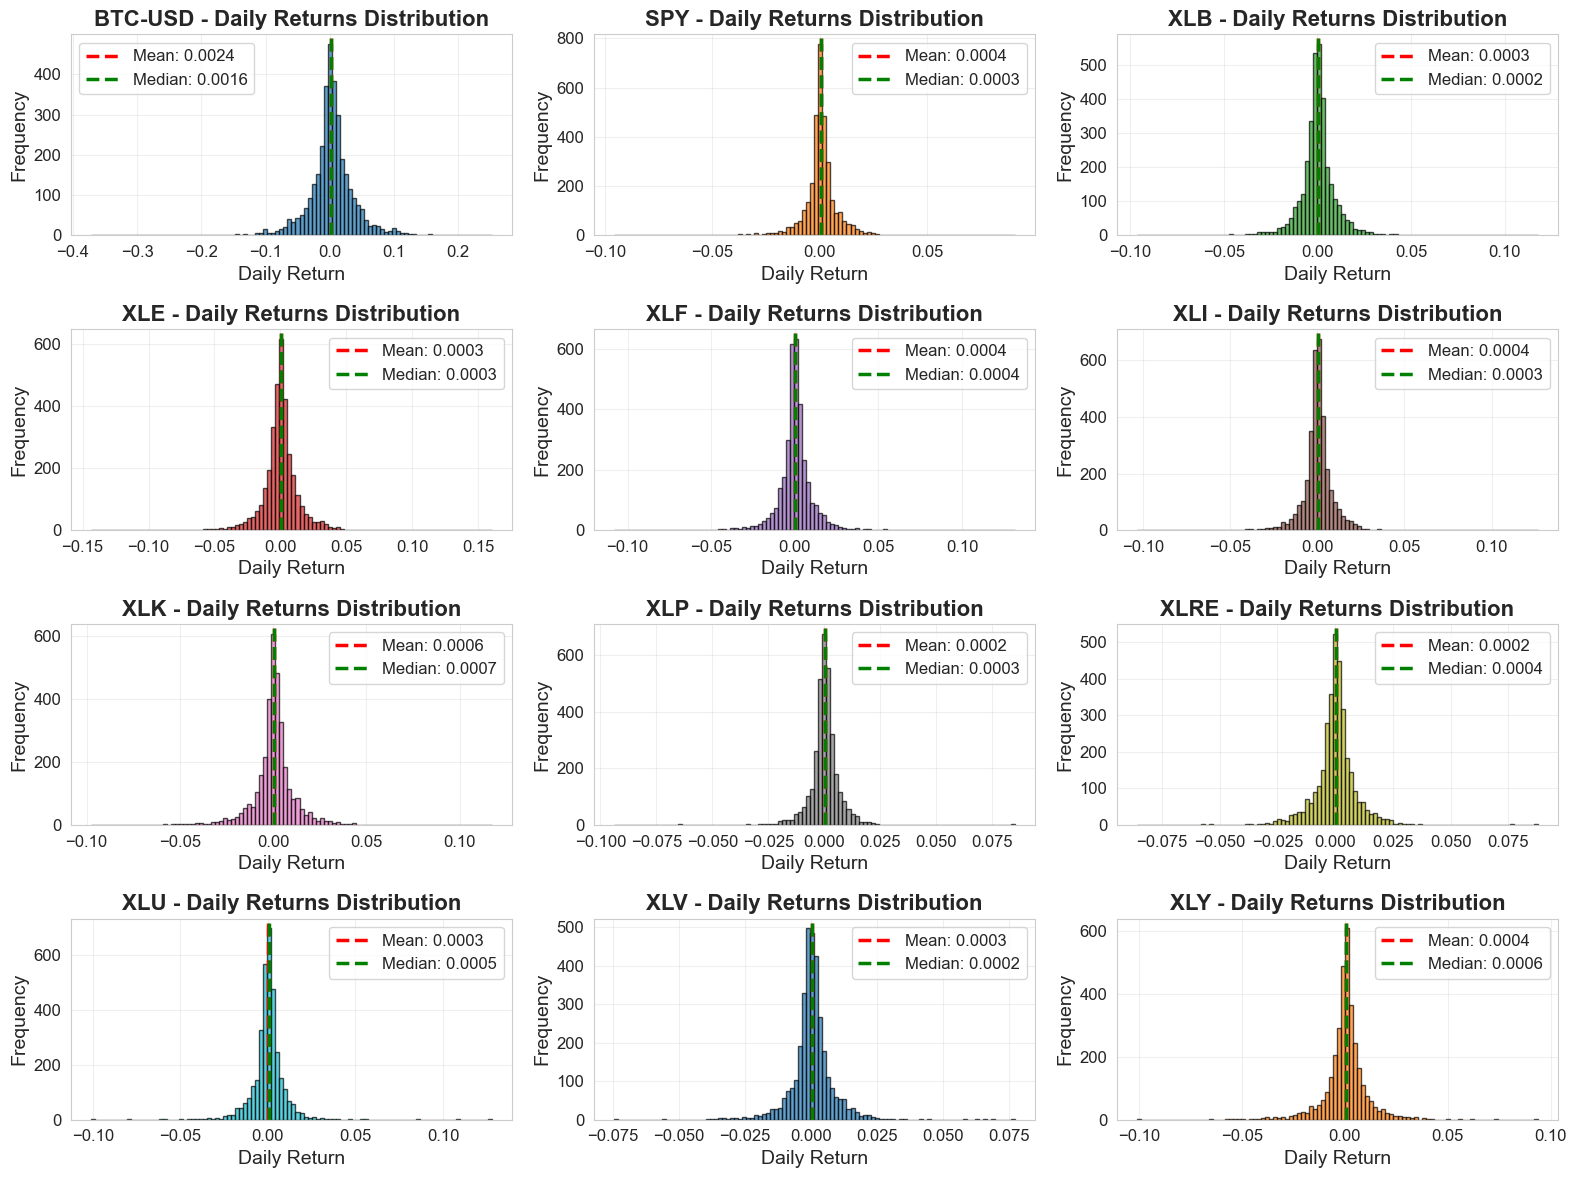

✓ Returns distribution histograms saved to visu_output/returns_distribution.png


In [5]:
# Plot histograms of returns for each ticker
fig, axes = plt.subplots(4, 3, figsize=(16, 12))
axes = axes.flatten()

for idx, ticker in enumerate(returns.columns):
    ax = axes[idx]
    
    # Histogram with KDE (Kernel Density Estimate)
    returns[ticker].hist(bins=100, ax=ax, alpha=0.7, color=f'C{idx}', edgecolor='black')
    
    # Add mean and median lines
    mean_val = returns[ticker].mean()
    median_val = returns[ticker].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2.5, label=f'Mean: {mean_val:.4f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2.5, label=f'Median: {median_val:.4f}')
    
    ax.set_title(f'{ticker} - Daily Returns Distribution', fontsize=16, fontweight='bold')
    ax.set_xlabel('Daily Return', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.savefig(output_dir / 'returns_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Returns distribution histograms saved to visu_output/returns_distribution.png")

## VIX Volatility Index Analysis

The VIX measures market volatility and investor fear/uncertainty.

In [6]:
# VIX statistics
print("VIX Statistics:\n")
print(vix.describe())
print(f"\nHighest VIX value: {vix['VIX'].max():.2f} on {vix['VIX'].idxmax().strftime('%Y-%m-%d')}")
print(f"Lowest VIX value: {vix['VIX'].min():.2f} on {vix['VIX'].idxmin().strftime('%Y-%m-%d')}")

VIX Statistics:

               VIX
count  2322.000000
mean     18.404022
std       7.437241
min       9.140000
25%      13.342500
50%      16.480000
75%      21.517500
max      82.690002

Highest VIX value: 82.69 on 2020-03-16
Lowest VIX value: 9.14 on 2017-11-03


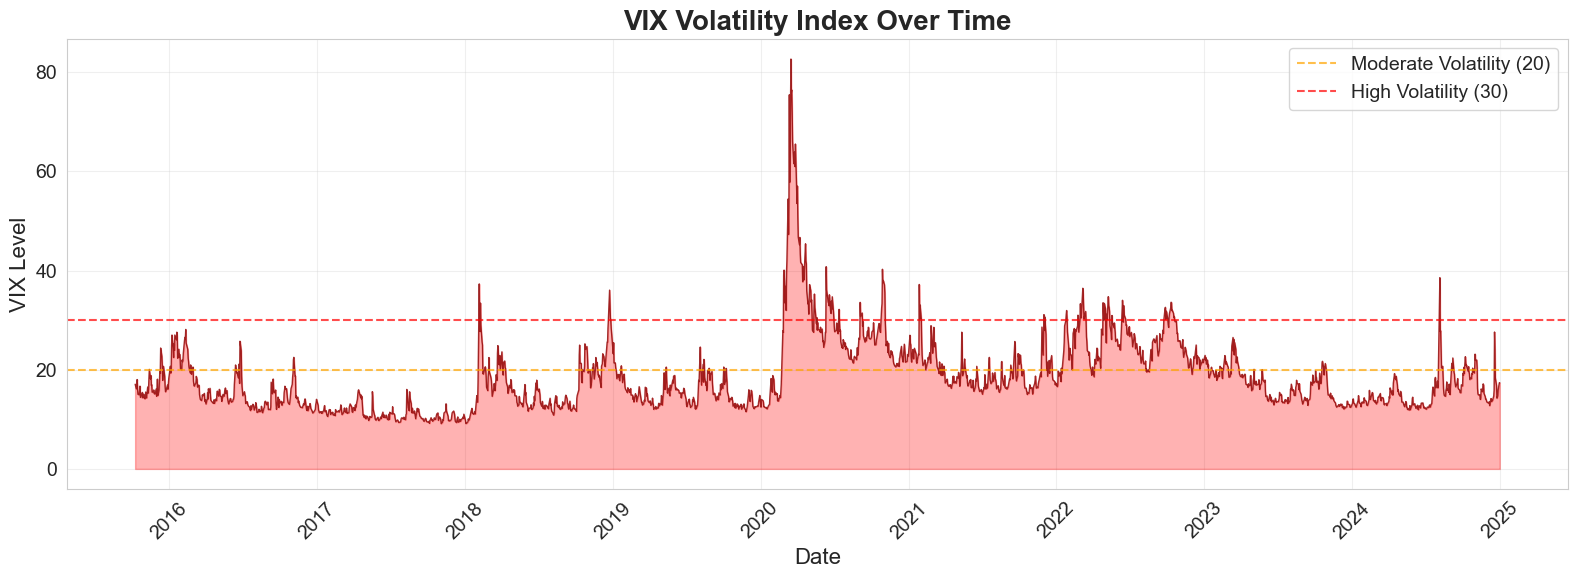

✓ VIX evolution chart saved to visu_output/vix_evolution.png


In [7]:
# Plot VIX over time
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(vix.index, vix['VIX'], linewidth=1, color='darkred', alpha=0.8)
ax.fill_between(vix.index, vix['VIX'], alpha=0.3, color='red')

# Add horizontal lines for typical VIX levels
ax.axhline(y=20, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Moderate Volatility (20)')
ax.axhline(y=30, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='High Volatility (30)')

ax.set_title('VIX Volatility Index Over Time', fontsize=20, fontweight='bold')
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('VIX Level', fontsize=16)
ax.legend(loc='upper right', fontsize=14)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(output_dir / 'vix_evolution.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ VIX evolution chart saved to visu_output/vix_evolution.png")

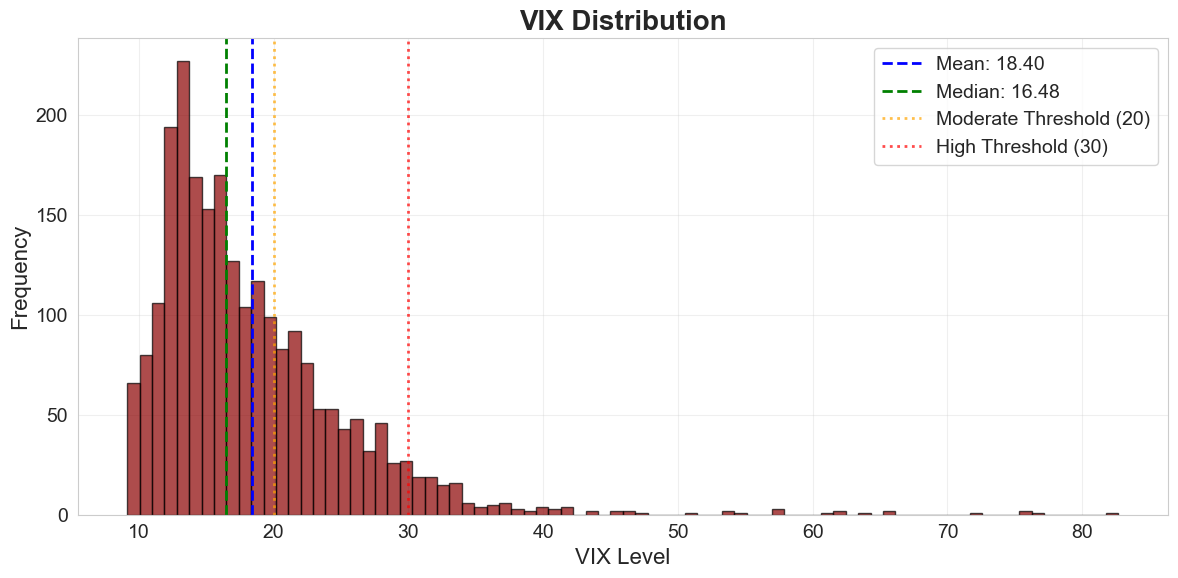

✓ VIX distribution histogram saved to visu_output/vix_distribution.png


In [8]:
# VIX distribution histogram
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(vix['VIX'], bins=80, color='darkred', alpha=0.7, edgecolor='black')

# Add mean and median lines
mean_vix = vix['VIX'].mean()
median_vix = vix['VIX'].median()
ax.axvline(mean_vix, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_vix:.2f}')
ax.axvline(median_vix, color='green', linestyle='--', linewidth=2, label=f'Median: {median_vix:.2f}')

# Mark typical VIX thresholds
ax.axvline(20, color='orange', linestyle=':', linewidth=2, alpha=0.7, label='Moderate Threshold (20)')
ax.axvline(30, color='red', linestyle=':', linewidth=2, alpha=0.7, label='High Threshold (30)')

ax.set_title('VIX Distribution', fontsize=20, fontweight='bold')
ax.set_xlabel('VIX Level', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.legend(fontsize=14)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'vix_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ VIX distribution histogram saved to visu_output/vix_distribution.png")

## Correlation Analysis

Examine the relationships between asset returns.

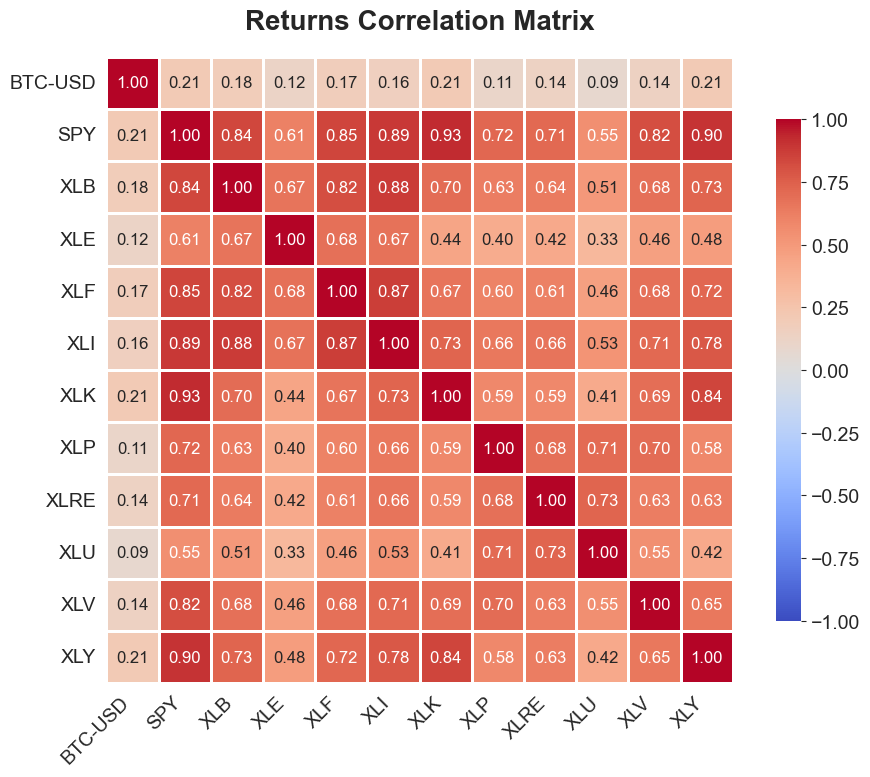

✓ Correlation matrix saved to visu_output/correlation_matrix.png


In [9]:
# Calculate correlation matrix
correlation_matrix = returns.corr()

# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax, annot_kws={"size": 12})

ax.set_title('Returns Correlation Matrix', fontsize=20, fontweight='bold', pad=20)
ax.tick_params(axis='both', labelsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig(output_dir / 'correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Correlation matrix saved to visu_output/correlation_matrix.png")